# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pycountry
import numpy as np
from pywaffle import Waffle

c:\Users\joseb\anaconda3\envs\tetris\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


sumber data: http://activityinequality.stanford.edu/

# Read Datasets

ada 3 alasan orang malas jalan kaki:
- fasilitas kurang memadai
- pelecehan seksual
- polusi

sumber artikel pendukung: https://health.detik.com/berita-detikhealth/d-3559399/5-alasan-malas-jalan-kaki-di-jakarta

sumber data: http://activityinequality.stanford.edu/

In [2]:
# survei tahun 2017
countries_by_steps = pd.read_csv('dataset/countries_by_steps.csv')
countries_by_steps

,rank,country,steps
0,1,Hong Kong,6880
1,2,China,6189
2,3,Ukraine,6107
3,4,Japan,6010
4,5,Russia,5969
5,6,Spain,5936
6,7,Sweden,5863
7,8,South Korea,5755
8,9,Singapore,5674
9,10,Switzerland,5512


In [37]:
countries_by_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rank     46 non-null     int64 
 1   country  46 non-null     object
 2   steps    46 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [38]:
def find_country(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ("not found")

countries_by_steps['country_code'] = countries_by_steps.apply(lambda row: find_country(row.country) , axis = 1)
countries_by_steps

,rank,country,steps,country_code
0,1,Hong Kong,6880,HKG
1,2,China,6189,CHN
2,3,Ukraine,6107,UKR
3,4,Japan,6010,JPN
4,5,Russia,5969,not found
5,6,Spain,5936,ESP
6,7,Sweden,5863,SWE
7,8,South Korea,5755,not found
8,9,Singapore,5674,SGP
9,10,Switzerland,5512,CHE


In [39]:
countries_by_steps[countries_by_steps['country_code'] == 'not found']

,rank,country,steps,country_code
4,5,Russia,5969,not found
7,8,South Korea,5755,not found
10,11,Czech Republic,5508,not found
25,26,Taiwan,5000,not found


In [40]:
mask_russia = countries_by_steps['country'] == 'Russia'
mask_south_korea = countries_by_steps['country'] == 'South Korea'
mask_czech = countries_by_steps['country'] == 'Czech Republic'
mask_taiwan = countries_by_steps['country'] == 'Taiwan'

countries_by_steps['country_code'] = np.where(mask_russia, 'RUS', countries_by_steps['country_code'])
countries_by_steps['country_code'] = np.where(mask_south_korea, 'KOR', countries_by_steps['country_code'])
countries_by_steps['country_code'] = np.where(mask_czech, 'CZE', countries_by_steps['country_code'])
countries_by_steps['country_code'] = np.where(mask_taiwan, 'TWN', countries_by_steps['country_code'])

countries_by_steps[countries_by_steps['country_code'] == 'not found']

,rank,country,steps,country_code


In [41]:
countries_by_steps.head(10)

,rank,country,steps,country_code
0,1,Hong Kong,6880,HKG
1,2,China,6189,CHN
2,3,Ukraine,6107,UKR
3,4,Japan,6010,JPN
4,5,Russia,5969,RUS
5,6,Spain,5936,ESP
6,7,Sweden,5863,SWE
7,8,South Korea,5755,KOR
8,9,Singapore,5674,SGP
9,10,Switzerland,5512,CHE


In [42]:
# survei tahun 2017
countries_with_gender_gap = pd.read_csv('dataset\countries_with_gender_gap.csv')
countries_with_gender_gap.head()

,country,steps_mean,steps_male_mean,steps_female_mean,gender_gap_(m-f),gender_gap_(m-f)/m
0,Sweden,5863,6049,5802,247,4.1%
1,Ukraine,6107,6130,5837,294,4.8%
2,Russia,5969,6200,5771,428,6.9%
3,Hungary,5258,5342,4959,383,7.2%
4,Norway,5246,5487,5072,415,7.6%


In [43]:
countries_with_gender_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             46 non-null     object
 1   steps_mean          46 non-null     int64 
 2   steps_male_mean     46 non-null     int64 
 3   steps_female_mean   46 non-null     int64 
 4   gender_gap_(m-f)    46 non-null     int64 
 5   gender_gap_(m-f)/m  46 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.3+ KB


In [44]:
countries_with_gender_gap = countries_with_gender_gap.rename(columns={'gender_gap_(m-f)':'gender_gap', 'gender_gap_(m-f)/m':'gender_gap_pct'})
countries_with_gender_gap['gender_gap_pct'] = countries_with_gender_gap['gender_gap_pct'].str.replace('%', '')
countries_with_gender_gap['gender_gap_pct'] = countries_with_gender_gap['gender_gap_pct'].astype('float')

In [45]:
countries_with_gender_gap.head()

,country,steps_mean,steps_male_mean,steps_female_mean,gender_gap,gender_gap_pct
0,Sweden,5863,6049,5802,247,4.1
1,Ukraine,6107,6130,5837,294,4.8
2,Russia,5969,6200,5771,428,6.9
3,Hungary,5258,5342,4959,383,7.2
4,Norway,5246,5487,5072,415,7.6


sumber data: https://jakarta.bps.go.id/statictable/2015/03/31/33/panjang-dan-luas-trotoar-di-provinsi-dki-jakarta-2001-2020.html

In [46]:
sidewalk_length_in_jakarta = pd.read_excel('dataset\panjang_dan_luas_trotoar_dki_jakarta.xls')
headers = sidewalk_length_in_jakarta.iloc[2]
sidewalk_length_in_jakarta = pd.DataFrame(sidewalk_length_in_jakarta.values[3:], columns=headers)
sidewalk_length_in_jakarta.head()

2,Tahun Anggaran,Panjang (Meter),Luas(M2)
0,2001,"511 194,00","766 791,00"
1,2002,"515 446,00","773 169,00"
2,2003,"515 446,10","773 169,10"
3,2004,"515 446,10","773 169,10"
4,2005,"536 561,86","871 558,08"


In [47]:
sidewalk_length_in_jakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tahun Anggaran   20 non-null     object
 1   Panjang (Meter)  20 non-null     object
 2   Luas(M2)         20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [48]:
sidewalk_length_in_jakarta = sidewalk_length_in_jakarta.rename(columns={'Panjang (Meter)':'Panjang (M)', 'Luas(M2)':'Luas (M2)'})
sidewalk_length_in_jakarta['Panjang (M)'] = sidewalk_length_in_jakarta['Panjang (M)'].str.replace(',', '.').str.replace(' ', '')
sidewalk_length_in_jakarta['Luas (M2)'] = sidewalk_length_in_jakarta['Luas (M2)'].str.replace(',', '.').str.replace(' ', '')

sidewalk_length_in_jakarta['Panjang (M)'] = sidewalk_length_in_jakarta['Panjang (M)'].astype('float')
sidewalk_length_in_jakarta['Luas (M2)'] = sidewalk_length_in_jakarta['Luas (M2)'].astype('float')
sidewalk_length_in_jakarta.tail()

2,Tahun Anggaran,Panjang (M),Luas (M2)
15,2016,543073.65,994972.33
16,2017,543073.65,994972.33
17,2018,543073.65,994972.33
18,2019,543073.65,994972.33
19,2020,545073.65,996972.33


In [49]:
sidewalk_length_in_jakarta

2,Tahun Anggaran,Panjang (M),Luas (M2)
0,2001,511194.00,766791.00
1,2002,515446.00,773169.00
2,2003,515446.10,773169.10
3,2004,515446.10,773169.10
4,2005,536561.86,871558.08
5,2006,536561.86,871558.08
6,2007,540336.86,978483.08
7,2008,540336.86,978483.08
8,2009,540336.86,978483.08
9,2010,540336.86,978483.08


In [50]:
sidewalk_length_2020 = sidewalk_length_in_jakarta.iloc[-1]['Panjang (M)']
sidewalk_length_2020 = sidewalk_length_2020 / 1000
round(sidewalk_length_2020, 2)

545.07

In [51]:
sidewalk_length_in_jakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tahun Anggaran  20 non-null     object 
 1   Panjang (M)     20 non-null     float64
 2   Luas (M2)       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [52]:
sidewalk_length_in_jakarta['Increase Percentage'] = round(sidewalk_length_in_jakarta['Panjang (M)'].pct_change(), 2)
sidewalk_length_in_jakarta = sidewalk_length_in_jakarta.fillna(0)
mean_increase_sidewalk = round(sidewalk_length_in_jakarta['Increase Percentage'].mean(), 4)
mean_increase_sidewalk

0.0035

sumber data: https://databoks.katadata.co.id/datapublish/2017/01/24/panjang-jalan-di-dki-jakarta-mencapai-7000-km

In [53]:
# survei tahun 2015
road_length_in_jakarta = pd.read_excel('dataset\panjang-jalan-di-dki-jakarta-mencapai-7000-km.xlsx')
road_length_in_jakarta

,nama_data,value
0,Jalan Negara (Kolektor Primer),23.69
1,Jalan Negara (Arteri Primer),128.88
2,Jalan Provinsi (Arteri Sekunder),535.26
3,Jalan Provinsi (Kolektor Sekunder),1027.02
4,Jalan Kota Administrasi,5117.26


In [54]:
road_length_in_jakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nama_data  5 non-null      object 
 1   value      5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [55]:
round(road_length_in_jakarta['value'].sum(), 2)

6832.11

sumber data: http://ruangaman.org/survei2019/

In [56]:
# survei tahun 2017
# total responden = 62.224
# total perempuan yang mengalami pelecehan seksual = 36.766
# total laki-laki yang mengalami pelecehan seksual = 23.403
# data_sex_harras_gender = {'jenis kelamin':['Laki-laki', 'Perempuan'], 'persentase':[11, 60]}
# sexual_harrasment_by_gender = pd.DataFrame(data_sex_harras_gender)
# sexual_harrasment_by_gender


In [57]:
# survei tahun 2018
sexual_harrasment_in_public_space = pd.read_excel('dataset\\transportasi-umum-sarang-pelecehan-seksual-di-ruang-publik.xlsx')
sexual_harrasment_in_public_space

,nama_data,value
0,Bus,35.80
1,Angkot,29.49
2,KRL Commuterline,18.14
3,Ojek Online,4.79
4,Ojek Konvensional,4.27


In [58]:
sexual_harrasment_in_public_space = sexual_harrasment_in_public_space.rename(columns={'nama_data':'moda_transportasi_umum', 'value':'persentase'})
sexual_harrasment_in_public_space

,moda_transportasi_umum,persentase
0,Bus,35.80
1,Angkot,29.49
2,KRL Commuterline,18.14
3,Ojek Online,4.79
4,Ojek Konvensional,4.27


In [59]:
# survei tahun 2018
data_sex_harras_types = {'bentuk_pelecehan':['Verbal', 'Fisik', 'Visual', 'Lainnya'], 'persentase':[60, 24, 15, 1]}
sexual_harrasment_types = pd.DataFrame(data_sex_harras_types)
sexual_harrasment_types

,bentuk_pelecehan,persentase
0,Verbal,60
1,Fisik,24
2,Visual,15
3,Lainnya,1


In [60]:
data_sex_harras_gender = {'jenis kelamin':['Laki-laki', 'Perempuan'], 'persentase':[11, 60]}
sexual_harrasment_by_gender = pd.DataFrame(data_sex_harras_gender)

In [61]:
# sumber data: laporan Pusat Pelayanan Terpadu Pemberdayaan Perempuan dan Anak (P2TP2A)
# artikel: https://www.cnnindonesia.com/nasional/20220714071745-20-821290/kasus-pelecehan-seksual-di-dki-jakarta-meningkat
data_sex_harras_jkt = {'tahun':['2020', '2021', '2022'], 'jumlah_kasus':[8, 7, 15]}
sexual_harrasment_in_jakarta = pd.DataFrame(data_sex_harras_jkt)
sexual_harrasment_in_jakarta

,tahun,jumlah_kasus
0,2020,8
1,2021,7
2,2022,15


sumber data: https://databoks.katadata.co.id/datapublish/2022/06/17/kualitas-udara-jakarta-pagi-ini-terburuk-kedua-di-dunia-jumat-17-juni-2022

In [62]:
# survei tahun 2022
world_rank_air_quality = pd.read_excel('dataset\kualitas-udara-jakarta-pagi-ini-terburuk-kedua-di-dunia-jumat-17-juni-2022.xlsx')
world_rank_air_quality

,nama_data,value
0,Johannesburg (Afsel),195
1,Jakarta (Indonesia),166
2,Dubai (UEA),161
3,Riyadh (Arab Saudi),143
4,Santiago (Chile),136
5,São Paulo (Brasil),127
6,Chengdu (Tiongkok),126
7,Beijing (Tiongkok),124
8,Ho Chi Minh (Vietnam),122
9,Hangzhou (Tiongkok),113


In [63]:
# AQI = Air Quality Index
world_rank_air_quality = world_rank_air_quality.rename(columns={'nama_data':'city', 'value':'AQI'})
world_rank_air_quality

,city,AQI
0,Johannesburg (Afsel),195
1,Jakarta (Indonesia),166
2,Dubai (UEA),161
3,Riyadh (Arab Saudi),143
4,Santiago (Chile),136
5,São Paulo (Brasil),127
6,Chengdu (Tiongkok),126
7,Beijing (Tiongkok),124
8,Ho Chi Minh (Vietnam),122
9,Hangzhou (Tiongkok),113


# Data Visualization

### Countries by Average Steps per Day

In [64]:
fig = px.choropleth(countries_by_steps, locations="country_code", color="steps",
                    color_continuous_scale=px.colors.diverging.BrBG,
                    color_continuous_midpoint=countries_by_steps['steps'].mean(),
                    hover_name="country",
                    title="<b>World Rank by Average Steps Per Day</b>")
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=30),
    paper_bgcolor="white",
    annotations = [dict(
    x=0.5,
    y=0.2,
    xref='paper',
    yref='paper',
    text='Source: <a href="http://activityinequality.stanford.edu/">\
        Activity Inequality</a>',
    showarrow = False
    )])
fig.show()

In [65]:
fig = px.bar(countries_with_gender_gap, x="country", y=["steps_male_mean", "steps_female_mean"], title="<b>Average Steps Per Day by Gender</b>", labels={'variable':'Gender', 'value':'Average Steps', 'country':'Country'})
newnames = {'steps_male_mean':'male', 'steps_female_mean': 'female'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [66]:
fig = px.bar(countries_with_gender_gap, x='country', y='gender_gap', 
                hover_data=['gender_gap', 'gender_gap_pct'], color='gender_gap', labels={'gender_gap':'Gender Gap', 'country': 'Country', 'gender_gap_pct':'Gender Gap (%)'},
                title='<b>Gender Gap in Average Steps Per Day</b>')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [67]:
fig = px.pie(sexual_harrasment_in_public_space, values='persentase', names='moda_transportasi_umum', color_discrete_sequence=px.colors.sequential.RdBu, title='<b>Sexual Harassment by Public Transport in Indonesia</b>')
fig.show()

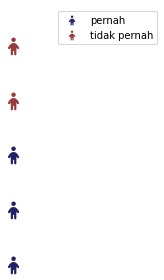

In [70]:
data_waffle_public_woman = {'pernah':3, 'tidak pernah':2}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data_waffle_public_woman, 
    colors=("#232066", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18, 
    icon_legend=True
)

In [71]:
fig = px.bar(sexual_harrasment_in_jakarta, x='tahun', y='jumlah_kasus', color='jumlah_kasus', labels={'tahun':'Tahun', 'jumlah_kasus': 'Jumlah Kasus'},
                title='<b>Female Sexual Harrasment Cases in Jakarta</b>', color_continuous_scale='Hot_r')
fig.show()

In [72]:
fig=px.bar(world_rank_air_quality,x='AQI',y='city',
           orientation='h',
           color = 'AQI',
           color_continuous_scale='Inferno_r'
           )
fig.update_layout(title='<b>Top 10 Cities with the Worst Air Quality Index</b>', yaxis=dict(autorange="reversed"))
fig.show()